In [16]:
import os
import pandas as pd
import csv
import matplotlib

In [17]:
inv_data = "Metro_invt_fs_uc_sfrcondo_sm_month.csv"
value_data = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df_inv = pd.read_csv(inv_data)
df_value = pd.read_csv(value_data)
print(df_value.head())


   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  112815.884620   
1    394913         1     New York, NY        msa        NY  179016.866340   
2    753899         2  Los Angeles, CA        msa        CA  225229.750975   
3    394463         3      Chicago, IL        msa        IL  140260.935566   
4    394514         4       Dallas, TX        msa        TX  128720.957496   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  113014.297752  113260.209562  113787.522445  114394.274429  ...   
1  179778.701216  180546.411097  182101.254842  183708.268404  ...   
2  226062.852930  227175.971878  229409.988288  231860.878234  ...   
3  140393.923049  140644.187618  141267.740940  142016.485458  ...   
4  128785.370590  128858.163118  129040.266249  129272.910526  ...   

      2022-06-30     2022-07-31     2022-08-31     2022-09-30     2022-10-31  \
0  334961.616261  337453.60086

In [38]:
df_inv_mi = df_inv[df_inv['StateName']=='MI']
df_inv_ca = df_inv[df_inv['StateName'] == 'CA']
df_inv_tx = df_inv[df_inv['StateName'] == 'TX']
df_inv_co = df_inv[df_inv['StateName'] == 'CO']



df_inv_mi
df_inv_ca
df_inv_tx
df_inv_co

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
19,394530,19,"Denver, CO",msa,CO,8266.0,9265.0,10460.0,11483.0,12175.0,...,9110.0,10163.0,10861.0,11049.0,10743.0,9938.0,8650.0,7481.0,6773.0,7001.0
79,394484,80,"Colorado Springs, CO",msa,CO,2034.0,2340.0,2865.0,3300.0,3701.0,...,2736.0,3179.0,3532.0,3608.0,3490.0,3209.0,2868.0,2531.0,2264.0,2205.0
151,394602,152,"Fort Collins, CO",msa,CO,1625.0,1779.0,1966.0,2074.0,2126.0,...,1461.0,1628.0,1704.0,1668.0,1605.0,1459.0,1271.0,1086.0,983.0,1001.0
155,394405,156,"Boulder, CO",msa,CO,1022.0,1173.0,1359.0,1497.0,1558.0,...,1123.0,1264.0,1346.0,1330.0,1285.0,1156.0,971.0,788.0,719.0,786.0
160,394645,161,"Greeley, CO",msa,CO,1558.0,1718.0,1796.0,1748.0,1651.0,...,1360.0,1514.0,1630.0,1692.0,1638.0,1500.0,1293.0,1155.0,1069.0,1102.0
260,395007,264,"Pueblo, CO",msa,CO,700.0,700.0,739.0,766.0,802.0,...,689.0,781.0,851.0,893.0,929.0,937.0,929.0,882.0,853.0,847.0
276,394639,280,"Grand Junction, CO",msa,CO,993.0,1035.0,1095.0,1147.0,1190.0,...,723.0,794.0,864.0,906.0,919.0,879.0,820.0,770.0,746.0,743.0
449,753881,456,"Glenwood Springs, CO",msa,CO,901.0,937.0,991.0,1048.0,1105.0,...,410.0,497.0,568.0,595.0,547.0,492.0,438.0,402.0,384.0,375.0
558,394556,566,"Edwards, CO",msa,CO,815.0,839.0,858.0,896.0,953.0,...,409.0,460.0,491.0,476.0,436.0,409.0,399.0,398.0,400.0,398.0
559,394547,567,"Durango, CO",msa,CO,570.0,610.0,693.0,763.0,818.0,...,408.0,464.0,495.0,494.0,472.0,426.0,371.0,323.0,287.0,268.0


In [55]:
df_value_mi = df_value[df_value['StateName']=='MI']
df_value_ca = df_value[df_value['StateName'] == 'CA']
df_value_tx = df_value[df_value['StateName'] == 'TX']
df_value_co = df_value[df_value['StateName'] == 'CO']


In [63]:
df_unpivoted_value_mi = df_value_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_ca = df_value_ca.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_tx = df_value_tx.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_co = df_value_co.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')


df_unpivoted_value_mi
df_unpivoted_value_ca
df_unpivoted_value_tx
df_unpivoted_value_co


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
0,394530,19,"Denver, CO",msa,CO,2000-01-31,194421.208701
1,394484,80,"Colorado Springs, CO",msa,CO,2000-01-31,163760.629752
2,394602,152,"Fort Collins, CO",msa,CO,2000-01-31,192165.399981
3,394405,156,"Boulder, CO",msa,CO,2000-01-31,237509.244055
4,394645,161,"Greeley, CO",msa,CO,2000-01-31,172007.703631
...,...,...,...,...,...,...,...
4738,753871,811,"Breckenridge, CO",msa,CO,2023-03-31,939851.323635
4739,394606,827,"Fort Morgan, CO",msa,CO,2023-03-31,327908.857540
4740,753921,867,"Steamboat Springs, CO",msa,CO,2023-03-31,937822.889733
4741,395130,890,"Sterling, CO",msa,CO,2023-03-31,246899.257175


In [65]:
df_unpivoted_value_mi['Date']=pd.to_datetime(df_unpivoted_value_mi['Date'])
df_unpivoted_value_ca['Date']=pd.to_datetime(df_unpivoted_value_ca['Date'])
df_unpivoted_value_tx['Date']=pd.to_datetime(df_unpivoted_value_tx['Date'])
df_unpivoted_value_co['Date']=pd.to_datetime(df_unpivoted_value_co['Date'])

In [42]:
df_unpivoted_value_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RegionID             8649 non-null   int64         
 1   SizeRank             8649 non-null   int64         
 2   RegionName           8649 non-null   object        
 3   RegionType           8649 non-null   object        
 4   StateName            8649 non-null   object        
 5   Date                 8649 non-null   datetime64[ns]
 6   Average Home Values  7655 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 473.1+ KB


In [69]:
df_post_covid_value_mi = df_unpivoted_value_mi[df_unpivoted_value_mi['Date'].dt.year>=2019]
df_post_covid_value_ca = df_unpivoted_value_ca[df_unpivoted_value_ca['Date'].dt.year >= 2019]
df_post_covid_value_tx = df_unpivoted_value_tx[df_unpivoted_value_tx['Date'].dt.year >= 2019]
df_post_covid_value_co = df_unpivoted_value_co[df_unpivoted_value_co['Date'].dt.year >= 2019]

df_post_covid_value_mi
df_post_covid_value_ca
df_post_covid_value_tx
df_post_covid_value_co

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
3876,394530,19,"Denver, CO",msa,CO,2019-01-31,438137.861906
3877,394484,80,"Colorado Springs, CO",msa,CO,2019-01-31,324315.055720
3878,394602,152,"Fort Collins, CO",msa,CO,2019-01-31,410126.508241
3879,394405,156,"Boulder, CO",msa,CO,2019-01-31,565189.579810
3880,394645,161,"Greeley, CO",msa,CO,2019-01-31,356468.214559
...,...,...,...,...,...,...,...
4738,753871,811,"Breckenridge, CO",msa,CO,2023-03-31,939851.323635
4739,394606,827,"Fort Morgan, CO",msa,CO,2023-03-31,327908.857540
4740,753921,867,"Steamboat Springs, CO",msa,CO,2023-03-31,937822.889733
4741,395130,890,"Sterling, CO",msa,CO,2023-03-31,246899.257175


In [72]:
df_unpivoted_inv_mi = df_inv_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_ca = df_inv_ca.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_tx = df_inv_tx.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_co = df_inv_co.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')


df_unpivoted_inv_mi
df_unpivoted_inv_ca
df_unpivoted_inv_tx
df_unpivoted_inv_co

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,394530,19,"Denver, CO",msa,CO,2018-03-31,8266.0
1,394484,80,"Colorado Springs, CO",msa,CO,2018-03-31,2034.0
2,394602,152,"Fort Collins, CO",msa,CO,2018-03-31,1625.0
3,394405,156,"Boulder, CO",msa,CO,2018-03-31,1022.0
4,394645,161,"Greeley, CO",msa,CO,2018-03-31,1558.0
...,...,...,...,...,...,...,...
1032,753871,811,"Breckenridge, CO",msa,CO,2023-03-31,258.0
1033,394606,827,"Fort Morgan, CO",msa,CO,2023-03-31,120.0
1034,753921,867,"Steamboat Springs, CO",msa,CO,2023-03-31,130.0
1035,395130,890,"Sterling, CO",msa,CO,2023-03-31,85.0


In [73]:
df_unpivoted_inv_mi['Date']=pd.to_datetime(df_unpivoted_inv_mi['Date'])
df_unpivoted_inv_ca['Date']=pd.to_datetime(df_unpivoted_inv_ca['Date'])
df_unpivoted_inv_tx['Date']=pd.to_datetime(df_unpivoted_inv_tx['Date'])
df_unpivoted_inv_co['Date']=pd.to_datetime(df_unpivoted_inv_co['Date'])

In [77]:
df_post_covid_inv_mi = df_unpivoted_inv_mi[df_unpivoted_inv_mi['Date'].dt.year>=2019]
df_post_covid_inv_ca = df_unpivoted_inv_ca[df_unpivoted_inv_ca['Date'].dt.year >= 2019]
df_post_covid_inv_tx = df_unpivoted_inv_tx[df_unpivoted_inv_tx['Date'].dt.year >= 2019]
df_post_covid_inv_co = df_unpivoted_inv_co[df_unpivoted_inv_co['Date'].dt.year >= 2019]

df_post_covid_inv_mi
df_post_covid_inv_ca



,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
340,753899,2,"Los Angeles, CA",msa,CA,2019-01-31,26635.0
341,395057,12,"San Francisco, CA",msa,CA,2019-01-31,6431.0
342,395025,13,"Riverside, CA",msa,CA,2019-01-31,20678.0
343,395056,17,"San Diego, CA",msa,CA,2019-01-31,9193.0
344,395045,26,"Sacramento, CA",msa,CA,2019-01-31,7116.0
...,...,...,...,...,...,...,...
2069,394472,492,"Clearlake, CA",msa,CA,2023-03-31,370.0
2070,395016,506,"Red Bluff, CA",msa,CA,2023-03-31,262.0
2071,753920,569,"Sonora, CA",msa,CA,2023-03-31,624.0
2072,395141,793,"Susanville, CA",msa,CA,2023-03-31,302.0


In [80]:
df_post_covid_inv_detroit = df_post_covid_inv_mi[df_post_covid_inv_mi['RegionName']=="Detroit, MI"]
df_post_covid_inv_la = df_post_covid_inv_ca[df_post_covid_inv_ca['RegionName'] == "Los Angeles, CA"]
df_post_covid_inv_dallas = df_post_covid_inv_tx[df_post_covid_inv_tx['RegionName'] == "Dallas, TX"]
df_post_covid_inv_denver = df_post_covid_inv_co[df_post_covid_inv_co['RegionName'] == "Denver, CO"]


df_post_covid_inv_detroit
df_post_covid_inv_la
df_post_covid_inv_dallas
df_post_covid_inv_denver

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
170,394530,19,"Denver, CO",msa,CO,2019-01-31,9739.0
187,394530,19,"Denver, CO",msa,CO,2019-02-28,9249.0
204,394530,19,"Denver, CO",msa,CO,2019-03-31,9945.0
221,394530,19,"Denver, CO",msa,CO,2019-04-30,10894.0
238,394530,19,"Denver, CO",msa,CO,2019-05-31,12422.0
255,394530,19,"Denver, CO",msa,CO,2019-06-30,13742.0
272,394530,19,"Denver, CO",msa,CO,2019-07-31,14466.0
289,394530,19,"Denver, CO",msa,CO,2019-08-31,14518.0
306,394530,19,"Denver, CO",msa,CO,2019-09-30,14218.0
323,394530,19,"Denver, CO",msa,CO,2019-10-31,13802.0


<AxesSubplot:xlabel='Date'>

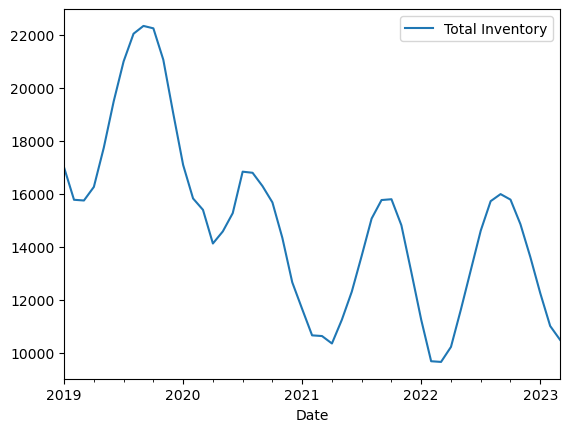

In [85]:
df_post_covid_inv_detroit.plot(x='Date', y='Total Inventory', kind='line')

<AxesSubplot:ylabel='Frequency'>

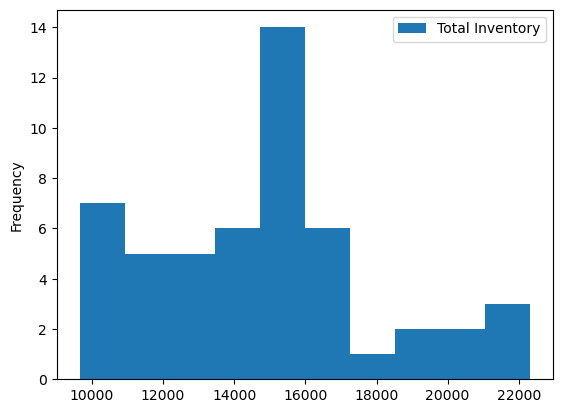

In [35]:
df_post_covid_inv_detroit.plot('Date', 'Total Inventory', kind='hist')


<AxesSubplot:xlabel='Date'>

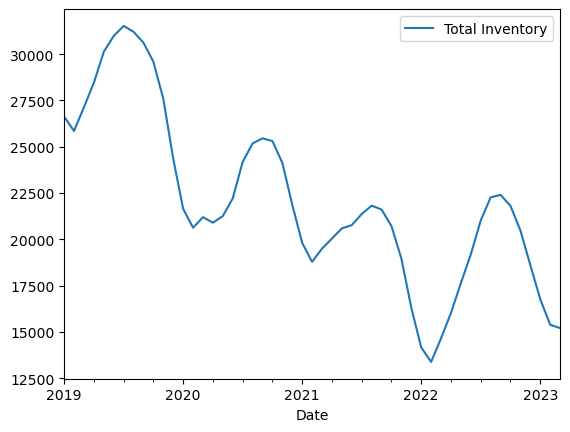

In [86]:
df_post_covid_inv_la.plot(x='Date', y='Total Inventory', kind='line')


<AxesSubplot:xlabel='Date'>

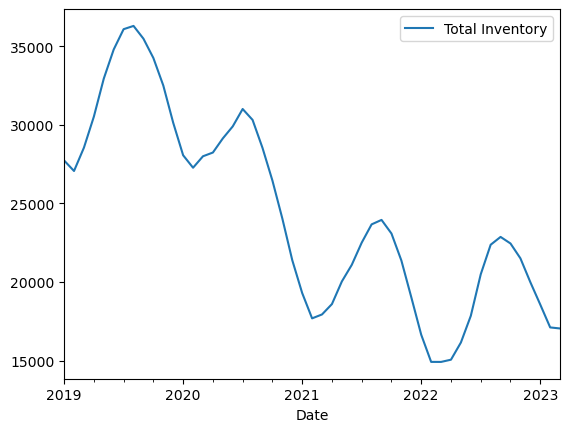

In [87]:
df_post_covid_inv_dallas.plot(x='Date', y='Total Inventory', kind='line')


<AxesSubplot:xlabel='Date'>

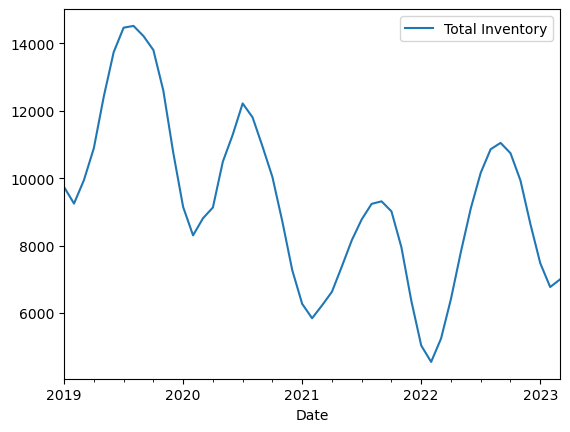

In [88]:
df_post_covid_inv_denver.plot(x='Date', y='Total Inventory', kind='line')


In [84]:
df_post_covid_value_detroit = df_post_covid_value_mi[df_post_covid_value_mi['RegionName'] == "Detroit, MI"]
df_post_covid_value_la = df_post_covid_value_ca[df_post_covid_value_ca['RegionName']== "Los Angeles, CA"]
df_post_covid_value_dallas = df_post_covid_value_tx[df_post_covid_value_tx['RegionName'] == "Dallas, TX"]
df_post_covid_value_denver = df_post_covid_value_co[df_post_covid_value_co['RegionName'] == "Denver, CO"]



df_post_covid_value_detroit
df_post_covid_value_la
df_post_covid_value_dallas
df_post_covid_value_denver


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
3876,394530,19,"Denver, CO",msa,CO,2019-01-31,438137.861906
3893,394530,19,"Denver, CO",msa,CO,2019-02-28,440706.229763
3910,394530,19,"Denver, CO",msa,CO,2019-03-31,443521.586199
3927,394530,19,"Denver, CO",msa,CO,2019-04-30,445897.963798
3944,394530,19,"Denver, CO",msa,CO,2019-05-31,446944.921690
3961,394530,19,"Denver, CO",msa,CO,2019-06-30,447469.385551
3978,394530,19,"Denver, CO",msa,CO,2019-07-31,447707.209303
3995,394530,19,"Denver, CO",msa,CO,2019-08-31,448428.016380
4012,394530,19,"Denver, CO",msa,CO,2019-09-30,449220.317428
4029,394530,19,"Denver, CO",msa,CO,2019-10-31,450639.061205


<AxesSubplot:xlabel='Date'>

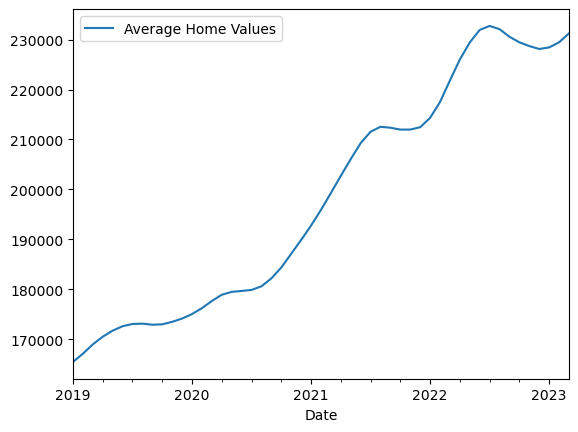

In [50]:
df_post_covid_value_detroit.plot(x='Date', y='Average Home Values', kind='line')


<AxesSubplot:xlabel='Date'>

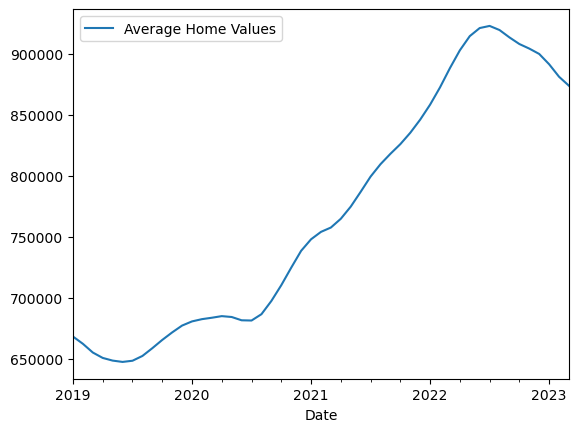

In [89]:
df_post_covid_value_la.plot(x='Date', y='Average Home Values', kind='line')


<AxesSubplot:xlabel='Date'>

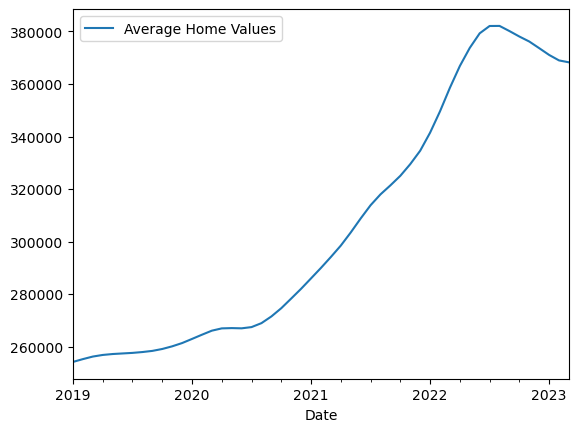

In [90]:
df_post_covid_value_dallas.plot(x='Date', y='Average Home Values', kind='line')

<AxesSubplot:xlabel='Date'>

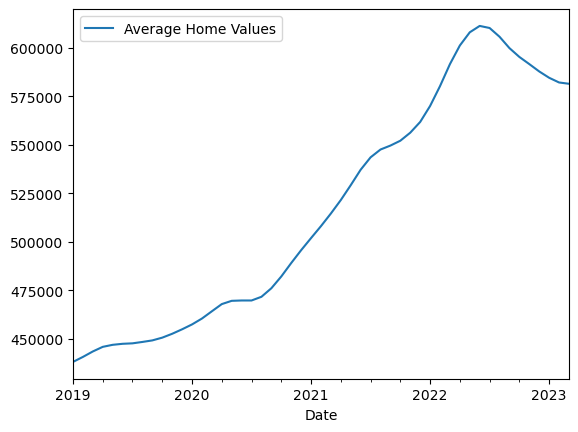

In [91]:
df_post_covid_value_denver.plot(x='Date', y='Average Home Values', kind='line')